In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle --upgrade

In [ ]:
# 아하.. 내 캐글 API를 넣는 거였다!
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sunmyyii","key":"2f3035b754d71b6997a01f6acd570181"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -1ha kaggle.json

kaggle.json


In [ ]:
!kaggle datasets download -d avijitpaulavi/ucf-crime-trimmed

100% 1.10G/1.10G [01:05<00:00, 19.5MB/s]
100% 1.10G/1.10G [01:05<00:00, 18.0MB/s]


In [ ]:
# 빈 폴더 생성
!mkdir -p /content/ucf-crime-trimmed

# 압축 해제
!unzip /content/ucf-crime-trimmed.zip -d /content/ucf-crime-trimmed

Archive:  /content/ucf-crime-trimmed.zip
  inflating: /content/ucf-crime-trimmed/Anomaly_Dataset/Anomaly_Videos/Anomaly-Videos-Part-1/Abuse/Abuse001_x264.mp4  
  inflating: /content/ucf-crime-trimmed/Anomaly_Dataset/Anomaly_Videos/Anomaly-Videos-Part-1/Abuse/Abuse002_x264.mp4  
  inflating: /content/ucf-crime-trimmed/Anomaly_Dataset/Anomaly_Videos/Anomaly-Videos-Part-1/Abuse/Abuse003_x264.mp4  
  inflating: /content/ucf-crime-trimmed/Anomaly_Dataset/Anomaly_Videos/Anomaly-Videos-Part-1/Abuse/Abuse004_x264.mp4  
  inflating: /content/ucf-crime-trimmed/Anomaly_Dataset/Anomaly_Videos/Anomaly-Videos-Part-1/Abuse/Abuse005_x264.mp4  
  inflating: /content/ucf-crime-trimmed/Anomaly_Dataset/Anomaly_Videos/Anomaly-Videos-Part-1/Abuse/Abuse006_x264.mp4  
  inflating: /content/ucf-crime-trimmed/Anomaly_Dataset/Anomaly_Videos/Anomaly-Videos-Part-1/Abuse/Abuse007_x264.mp4  
  inflating: /content/ucf-crime-trimmed/Anomaly_Dataset/Anomaly_Videos/Anomaly-Videos-Part-1/Abuse/Abuse008_x264.mp4  
  infla

### 참고 자료 : <a href='https://www.youtube.com/watch?v=QmtSkq3DYko'>Human Activity Recognition using TensorFlow (CNN + LSTM) | 2 Methods
</a>

### Data : https://www.kaggle.com/datasets/alirakhmaev/ucf-crime-full

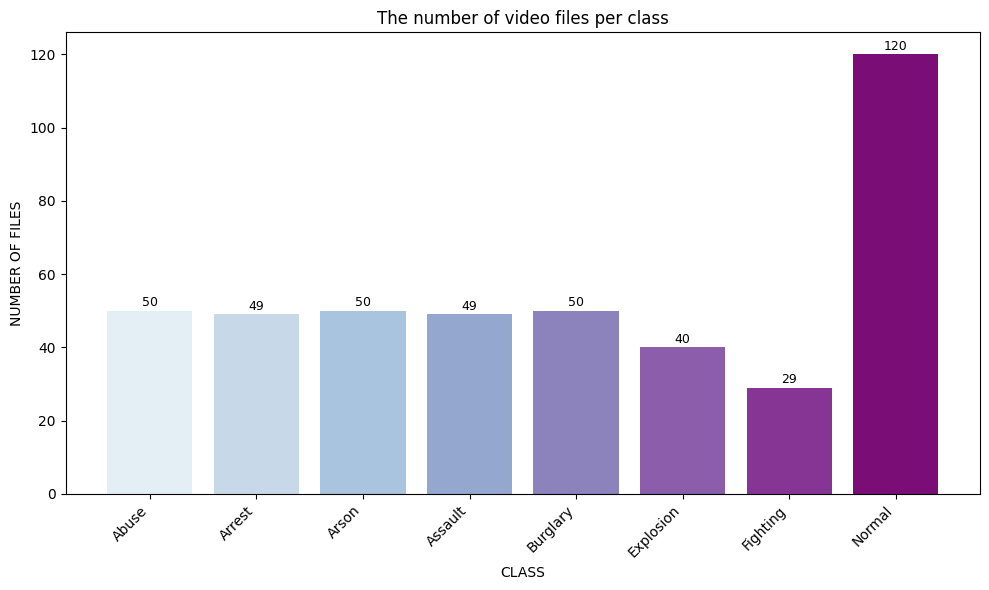

{'Abuse': 50, 'Arrest': 49, 'Arson': 50, 'Assault': 49, 'Burglary': 50, 'Explosion': 40, 'Fighting': 29, 'Normal': 120}


In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 폴더 경로
data_folder = '/content/ucf-crime-trimmed/Anomaly_Dataset/Anomaly_Videos/'

# 클래스 목록과 경로
classes = ['Abuse', 'Arrest', 'Arson', 'Assault', 'Burglary', 'Explosion', 'Fighting', 'Normal']
class_folders = ['Anomaly-Videos-Part-1', 'Anomaly-Videos-Part-2', 'Normal-Videos-Part-1']

# 각 클래스별 파일 개수 저장할 딕셔너리 초기화
class_file_counts = {class_name: 0 for class_name in classes}

# 각 클래스별로 파일 개수 계산
for class_folder in class_folders:
    class_folder_path = os.path.join(data_folder, class_folder)
    if class_folder != 'Normal-Videos-Part-1':
        for class_name in classes:
            class_path = os.path.join(class_folder_path, class_name)
            if os.path.exists(class_path):
                class_file_counts[class_name] += len(os.listdir(class_path))
    else:
        class_name = 'Normal'
        if os.path.exists(class_folder_path):
            class_file_counts[class_name] += len(os.listdir(class_folder_path))

# 그래프 생성
colors = sns.color_palette('BuPu',len(classes))
plt.figure(figsize=(10, 6))
bars = plt.bar(class_file_counts.keys(), class_file_counts.values(), color=colors)
plt.xlabel('CLASS')
plt.ylabel('NUMBER OF FILES')
plt.title('The number of video files per class')
plt.xticks(rotation=45, ha="right")


# 막대 위에 숫자 정보 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval+4, round(yval), va='top', ha='center', fontsize=9)

# 그래프 표시
plt.tight_layout()
plt.show()

print(class_file_counts)

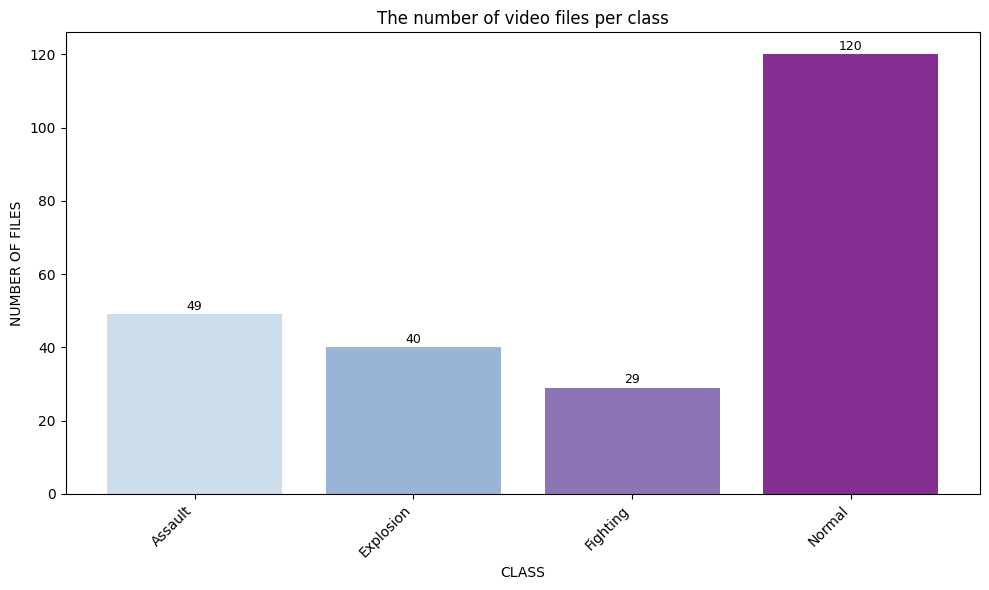

{'Assault': 49, 'Explosion': 40, 'Fighting': 29, 'Normal': 120}


In [ ]:
# 데이터 폴더 경로
data_folder = '/content/ucf-crime-trimmed/Anomaly_Dataset/Anomaly_Videos/'

# 클래스 목록과 경로
classes = ['Assault', 'Explosion', 'Fighting', 'Normal']
class_folders = ['Anomaly-Videos-Part-1', 'Anomaly-Videos-Part-2', 'Normal-Videos-Part-1']

# 각 클래스별 파일 개수 저장할 딕셔너리 초기화
class_file_counts = {class_name: 0 for class_name in classes}

# 각 클래스별로 파일 개수 계산
for class_folder in class_folders:
    class_folder_path = os.path.join(data_folder, class_folder)
    if class_folder != 'Normal-Videos-Part-1':
        for class_name in classes:
            class_path = os.path.join(class_folder_path, class_name)
            if os.path.exists(class_path):
                class_file_counts[class_name] += len(os.listdir(class_path))
    else:
        class_name = 'Normal'
        if os.path.exists(class_folder_path):
            class_file_counts[class_name] += len(os.listdir(class_folder_path))

# 그래프 생성
colors = sns.color_palette('BuPu',len(classes))
# 색깔 https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
plt.figure(figsize=(10, 6))
bars = plt.bar(class_file_counts.keys(), class_file_counts.values(), color=colors)
plt.xlabel('CLASS')
plt.ylabel('NUMBER OF FILES')
plt.title('The number of video files per class')
plt.xticks(rotation=45, ha="right")


# 막대 위에 숫자 정보 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval+4, round(yval), va='top', ha='center', fontsize=9)

# 그래프 표시
plt.tight_layout()
plt.show()

print(class_file_counts)

In [ ]:
# Import the required libraries.
import os
import cv2
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [ ]:
# mini 폴더 생성
!mkdir /content/ucf-crime-trimmed/mini

# 폴더 이동과 이름 변경
!mv /content/ucf-crime-trimmed/Anomaly_Dataset/Anomaly_Videos/Anomaly-Videos-Part-1/Assault /content/ucf-crime-trimmed/mini
!mv /content/ucf-crime-trimmed/Anomaly_Dataset/Anomaly_Videos/Anomaly-Videos-Part-2/Explosion /content/ucf-crime-trimmed/mini
!mv /content/ucf-crime-trimmed/Anomaly_Dataset/Anomaly_Videos/Anomaly-Videos-Part-2/Fighting /content/ucf-crime-trimmed/mini
!mv /content/ucf-crime-trimmed/Anomaly_Dataset/Anomaly_Videos/Normal-Videos-Part-1 /content/ucf-crime-trimmed/mini/Normal

In [ ]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
seed_constant = 42
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [ ]:
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64
# Error : Your notebook tried to allocate more memory than is available. It has restarted.

# 시퀀스로 공급될 비디오 프레임 수
SEQUENCE_LENGTH = 200

DATASET_DIR = "/content/ucf-crime-trimmed/mini"
CLASSES_LIST = sorted([entry.name for entry in os.scandir(DATASET_DIR) if entry.is_dir()])

In [ ]:
CLASSES_LIST

['Assault', 'Explosion', 'Fighting', 'Normal']

In [ ]:
def display_random_video_frames(dataset_dir, num_classes, rows, cols):
    '''
    Display randomly selected video frames from randomly selected classes.
    Args:
        dataset_dir: Path to the directory containing the dataset.
        num_classes: Number of classes to display (default is 6).
        rows: Number of rows in the display grid (default is 2).
        cols: Number of columns in the display grid (default is 3).
    '''

    # Get the list of all class names in the dataset directory.
    all_classes_names = os.listdir(dataset_dir)

    # Randomly select num_classes classes.
    random_classes = random.sample(all_classes_names, num_classes)

    # Create a Matplotlib figure and specify the size of the figure.
    plt.figure(figsize=(15, 10))

    # Iterate through the selected classes.
    for i, class_name in enumerate(random_classes, 1):

        # Get the list of video files in the current class directory.
        video_files_names_list = os.listdir(os.path.join(dataset_dir, class_name))

        # Randomly select a video file from the class directory.
        selected_video_file_name = random.choice(video_files_names_list)

        # Initialize a VideoCapture object to read from the video file.
        video_reader = cv2.VideoCapture(os.path.join(dataset_dir, class_name, selected_video_file_name))

        # Read the first frame of the video file.
        _, bgr_frame = video_reader.read()

        # Release the VideoCapture object.
        video_reader.release()

        # Convert the frame from BGR to RGB format.
        rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

        # Write the class name on the video frame.
        cv2.putText(rgb_frame, class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 102, 102), 2)

        # Display the frame.
        plt.subplot(rows, cols, i)
        plt.imshow(rgb_frame)
        plt.axis('off')

    # Show the plot.
    plt.tight_layout()
    plt.show()



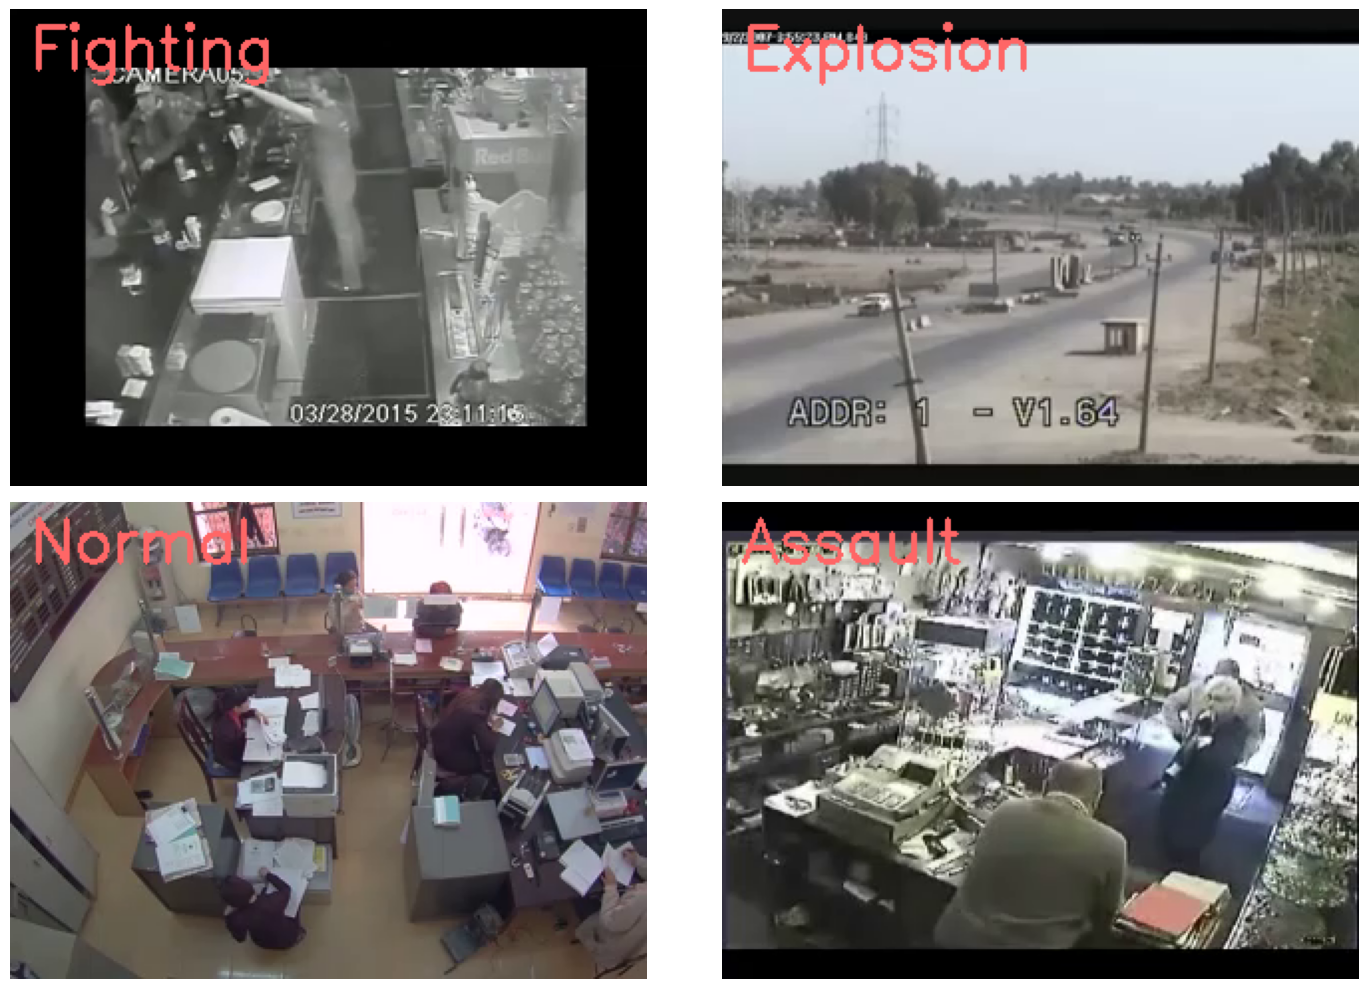

In [ ]:
display_random_video_frames(DATASET_DIR, num_classes=4, rows=2, cols=2)

In [ ]:
# def frames_extraction(video_path, max_video_frame_length=100000000):  #### 2000에서 20000으로 수정
#     '''
#     This function will extract the required frames from a video after resizing and normalizing them.
#     Args:
#         video_path: The path of the video in the disk, whose frames are to be extracted.
#         max_video_length: Maximum video length in seconds (default is 60 seconds).
#     Returns:
#         frames_list: A list containing the resized and normalized frames of the video.
#     '''

#     # Declare a list to store video frames.
#     frames_list = []

#     # Read the Video File using the VideoCapture object.
#     video_reader = cv2.VideoCapture(video_path)

#     # Get the total number of frames in the video.
#     video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

#     # If the video length exceeds the maximum allowed, return empty frames_list.
#     if video_frames_count > max_video_frame_length:
#         video_reader.release()
#         return frames_list

#     # Calculate the interval after which frames will be added to the list.
#     skip_frames_window = max(int(video_frames_count / SEQUENCE_LENGTH), 1)

#     # Iterate through the Video Frames.
#     for frame_counter in range(SEQUENCE_LENGTH):

#         # Set the current frame position of the video.
#         video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

#         # Reading the frame from the video.
#         success, frame = video_reader.read()

#         # Check if Video frame is not successfully read then break the loop
#         if not success:
#             break

#         # Resize the Frame to fixed height and width.
#         resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))

#         # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
#         normalized_frame = resized_frame / 255


#         # Append the normalized frame into the frames list
#         frames_list.append(normalized_frame)

#     # Release the VideoCapture object.
#     video_reader.release()

#     # Return the frames list.
#     return frames_list



In [ ]:
def frames_extraction(video_path, max_video_frame_length=100000000):  #### 2000에서 20000으로 수정
    '''
    This function will extract the required frames from a video after resizing and normalizing them.
    Args:
        video_path: The path of the video in the disk, whose frames are to be extracted.
        max_video_length: Maximum video length in seconds (default is 60 seconds).
    Returns:
        frames_list: A list containing the resized and normalized frames of the video.
    '''
    # Declare a list to store video frames.
    frames_list = []

    # Read the Video File using the VideoCapture object.
    video_reader = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # If the video length exceeds the maximum allowed, return empty frames_list.
    if video_frames_count > max_video_frame_length:
        video_reader.release()
        return frames_list

    # Calculate the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count / SEQUENCE_LENGTH), 1)

    # Iterate through the Video Frames.
    for frame_counter in range(SEQUENCE_LENGTH):

        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Reading the frame from the video.
        success, frame = video_reader.read()

        # Check if Video frame is not successfully read then break the loop
        if not success:
            break

        # Resize the Frame to fixed height and width.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))

        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255


        # Append the normalized frame into the frames list
        frames_list.append(normalized_frame)

    # Release the VideoCapture object.
    video_reader.release()

    # Return the frames list.
    return frames_list

In [ ]:
# from tqdm import tqdm

# def create_dataset():
#     '''
#     This function will extract the data of the selected classes and create the required dataset.
#     Returns:
#         features:          A list containing the extracted frames of the videos.
#         labels:            A list containing the indexes of the classes associated with the videos.
#         video_files_paths: A list containing the paths of the videos in the disk.
#     '''
#     # Declared Empty Lists to store the features, labels and video file path values.
#     features = []
#     labels = []
#     video_files_paths = []
#     max_length_video_dict = {}

#     # Iterating through all the classes mentioned in the classes list
#     for class_index, class_name in tqdm(enumerate(CLASSES_LIST)):
#         max_length_video_cnt = 0

#         # Display the name of the class whose data is being extracted.
#         print(f'Extracting Data of Class: {class_name}')

#         # Get the list of video files present in the specific class name directory.
#         files_list = os.listdir(os.path.join(DATASET_DIR, class_name))

#         # Counter to keep track of the number of videos extracted for each class
# #         video_count = 0

#         # Iterate through all the files present in the files list.
#         for file_name in files_list:

#             # Get the complete video path.
#             video_file_path = os.path.join(DATASET_DIR, class_name, file_name)

#             # Extract the frames of the video file.
#             # 동영상의 시간은 30초부터 1분 30초 까지 다양합니다
#             # 동영상의 총 프레임 수가 2500 이하인 프레임만 사용합니다
#             frames = frames_extraction(video_file_path, 25000)  #### 2500을 20000으로 수정함


#             if len(frames) == SEQUENCE_LENGTH:

#                 # Append the data to their repective lists.
#                 features.append(frames)
#                 labels.append(class_index)
#                 video_files_paths.append(video_file_path)
#             else:
#                 max_length_video_cnt+=1
#                 max_length_video_dict[class_name] = max_length_video_cnt


#     features = np.asarray(features)
#     labels = np.array(labels)
#     print('Video over max frame   : ',max_length_video_dict)

#     # Return the frames, class index, and video file path.
#     return features, labels, video_files_paths

In [ ]:
from tqdm import tqdm

def create_dataset():
    '''
    This function will extract the data of the selected classes and create the required dataset.
    Returns:
        features:          A list containing the extracted frames of the videos.
        labels:            A list containing the indexes of the classes associated with the videos.
        video_files_paths: A list containing the paths of the videos in the disk.
    '''
    # Declared Empty Lists to store the features, labels and video file path values.
    features = []
    labels = []
    video_files_paths = []
    max_length_video_dict = {}
    max_frame_length = 0
    n=0
    for class_name in tqdm(CLASSES_LIST):
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))
        for file_name in files_list:
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)
            # print(video_file_path)
            frames = frames_extraction(video_file_path, 10000000000000)  # 0 indicates just counting frames
            max_frame_length = max(max_frame_length, len(frames))
            n+=1
            # print(len(frames), max_frame_length, n)

    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in tqdm(enumerate(CLASSES_LIST)):
        max_length_video_cnt = 0

        # Display the name of the class whose data is being extracted.
        print(f'Extracting Data of Class: {class_name}')

        # Get the list of video files present in the specific class name directory.
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))

        # Counter to keep track of the number of videos extracted for each class
#         video_count = 0

        # Iterate through all the files present in the files list.
        for file_name in files_list:

            # Get the complete video path.
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)

            # Extract the frames of the video file.
            # 동영상의 시간은 30초부터 1분 30초 까지 다양합니다
            # 동영상의 총 프레임 수가 2500 이하인 프레임만 사용합니다
            frames = frames_extraction(video_file_path, 10000000000000) # 1000...대신 max_frame_length로 했더니 오류가 났다. 그 이유는 max_frame_length보다 프레임수가 큰 경우 프레임 추출 함수에서 전처리 전의 프레임 수와 비교하게 되므로

            diff = max_frame_length - len(frames)
            if diff > 0:
                repeated_frames = np.repeat(frames, (diff // len(frames)) + 1, axis=0)
                frames_to_add = repeated_frames[:diff]  # diff만큼의 프레임을 추가할 부분
                frames = np.concatenate((frames, frames_to_add), axis=0)

            features.append(frames)
            labels.append(class_index)
            video_files_paths.append(video_file_path)




    features = np.asarray(features)
    labels = np.array(labels)
    print('Video over max frame   : ',max_length_video_dict)

    # Return the frames, class index, and video file path.
    return features, labels, video_files_paths

In [ ]:
features, labels, video_files_paths = create_dataset()

100%|██████████| 4/4 [06:39<00:00, 99.98s/it] 
0it [00:00, ?it/s]

Extracting Data of Class: Assault


1it [01:10, 70.05s/it]

Extracting Data of Class: Explosion


2it [02:08, 63.39s/it]

Extracting Data of Class: Fighting


3it [03:00, 57.97s/it]

Extracting Data of Class: Normal


4it [06:38, 99.57s/it] 


Video over max frame   :  {}


In [ ]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [ ]:
import pickle

# 데이터를 저장할 파일 경로
output_file_path = "/content/ucf_crime_trimmed_data.pkl"

# 데이터를 하나의 딕셔너리로 묶어준다고 가정합니다.
data = {
    "features": features,
    "labels": labels,
    "video_files_paths": video_files_paths
}

# 데이터 저장
with open(output_file_path, "wb") as output_file:
    pickle.dump(data, output_file)

print("Data saved to", output_file_path)

Data saved to /content/ucf_crime_trimmed_data.pkl


In [ ]:
# Using Keras's to_categorical method to convert labels into one-hot-encoded vectors
one_hot_encoded_labels = to_categorical(labels)

# split 3가지

- stratify 없

In [ ]:
# Split the Data into Train ( 80% ) and Test Set ( 20% ).
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels,
                                                                            test_size = 0.2, shuffle = True,
                                                                            random_state = seed_constant)

- stratify 넣기

In [ ]:
# Split the Data into Train ( 80% ) and Test Set ( 20% ).
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels,
                                                                            test_size = 0.2, shuffle = True, stratify=one_hot_encoded_labels,
                                                                            random_state = seed_constant)

- 클래스별 비율 맞추기

In [ ]:
# Split the Data into Train ( 80% ) and Test Set ( 20% ).
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels,
                                                                            test_size = 0.2, shuffle = True, stratify=one_hot_encoded_labels,
                                                                            random_state = seed_constant)


In [ ]:
# Now, split the Train data further into Train and Validation sets.
features_train, features_val, labels_train, labels_val = train_test_split(features_train, labels_train,
                                                                          test_size = 0.2, shuffle = True,
                                                                          stratify=labels_train,
                                                                          random_state = seed_constant)

In [ ]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    '''
    This function will plot the metrics passed to it in a graph.
    Args:
        model_training_history: A history object containing a record of training and validation
                                loss values and metrics values at successive epochs
        metric_name_1:          The name of the first metric that needs to be plotted in the graph.
        metric_name_2:          The name of the second metric that needs to be plotted in the graph.
        plot_name:              The title of the graph.
    '''

    # Get metric values using metric names as identifiers.
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]

    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(metric_value_1))

    # Plot the Graph.
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    # Add title to the plot.
    plt.title(str(plot_name))

    # Add legend to the plot.
    plt.legend()

In [ ]:
from tensorflow.keras.regularizers import l2

def create_LRCN_model():
    '''
    This function will construct the required LRCN model.
    Returns:
        model: It is the required constructed LRCN model.
    '''

    # We will use a Sequential model for model construction.
    model = Sequential()

    # Define the Model Architecture.
    ########################################################################################################################

    model.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation = 'relu'),
                              input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))

    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    #model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Flatten()))

    model.add(LSTM(32))

    model.add(Dropout(0.5)) ##### 추가

    # model.add(Dense(32, activation='relu'))

    model.add(Dense(len(CLASSES_LIST), activation = 'softmax', kernel_regularizer=l2(0.01)))
    # model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))


    ########################################################################################################################

    # Display the models summary.
    model.summary()

    # Return the constructed LRCN model.
    return model

In [ ]:
# Construct the required LRCN model.
LRCN_model = create_LRCN_model()

# Display the success message.
print("Model Created Successfully!")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_24 (TimeDi  (None, 200, 64, 64, 16)  448       
 stributed)                                                      
                                                                 
 time_distributed_25 (TimeDi  (None, 200, 16, 16, 16)  0         
 stributed)                                                      
                                                                 
 time_distributed_26 (TimeDi  (None, 200, 16, 16, 16)  0         
 stributed)                                                      
                                                                 
 time_distributed_27 (TimeDi  (None, 200, 16, 16, 32)  4640      
 stributed)                                                      
                                                                 
 time_distributed_28 (TimeDi  (None, 200, 4, 4, 32)   

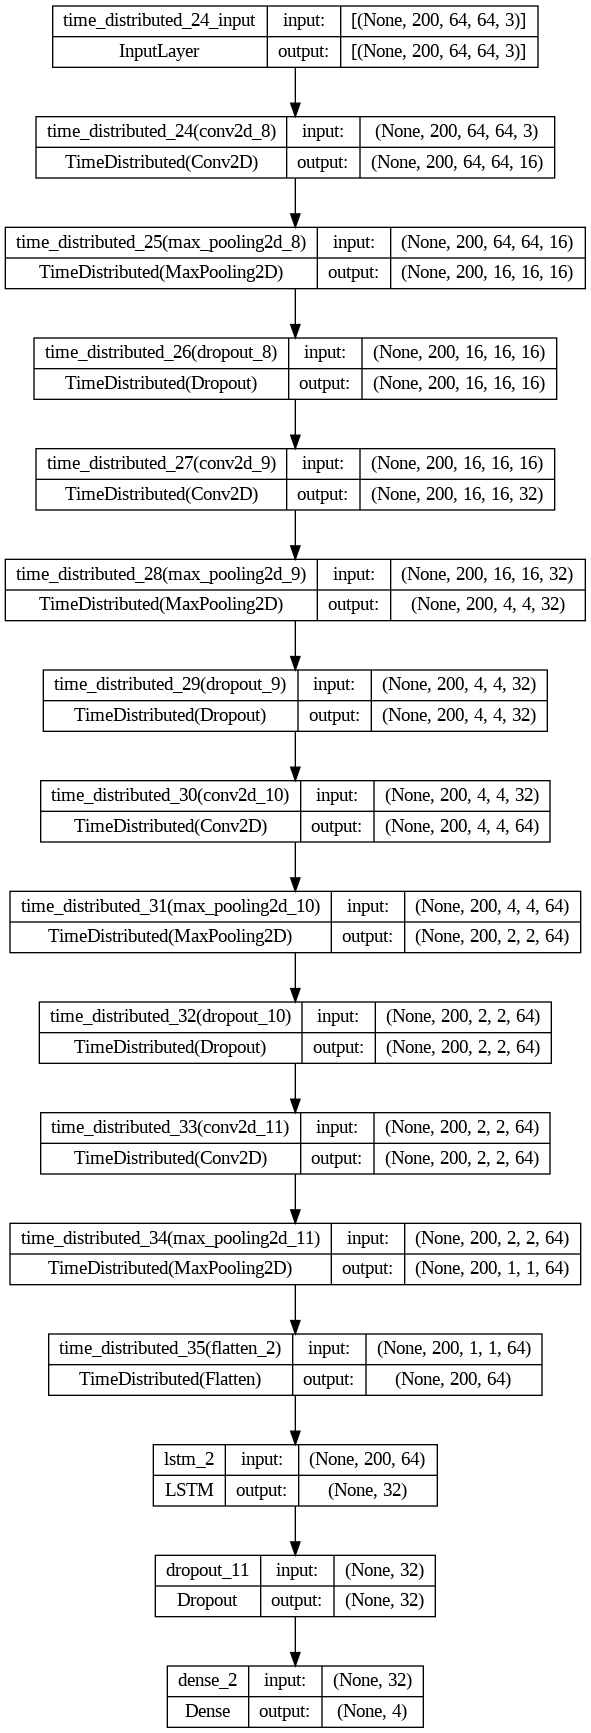

In [ ]:
# Plot the structure of the contructed LRCN model.
plot_model(LRCN_model, to_file = 'LRCN_model_structure_plot.png', show_shapes = True, show_layer_names = True)

# dropout(0.5) 추가, batch size 4

# L2 없

- stratify x

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=50,  mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

batch_size = 4

# Start training the model.
LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = batch_size ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/100
38/38 [==============================] - 6s 70ms/step - loss: 0.8368 - accuracy: 0.6579 - val_loss: 0.9841 - val_accuracy: 0.6579
Epoch 2/100
38/38 [==============================] - 2s 46ms/step - loss: 0.8472 - accuracy: 0.6382 - val_loss: 0.6906 - val_accuracy: 0.7632
Epoch 3/100
38/38 [==============================] - 2s 47ms/step - loss: 0.7962 - accuracy: 0.6776 - val_loss: 0.7321 - val_accuracy: 0.7368
Epoch 4/100
38/38 [==============================] - 2s 47ms/step - loss: 0.6958 - accuracy: 0.7434 - val_loss: 0.7079 - val_accuracy: 0.7895
Epoch 5/100
38/38 [==============================] - 2s 47ms/step - loss: 0.7140 - accuracy: 0.7039 - val_loss: 0.7858 - val_accuracy: 0.6842
Epoch 6/100
38/38 [==============================] - 2s 47ms/step - loss: 0.6702 - accuracy: 0.7105 - val_loss: 0.7003 - val_accuracy: 0.7368
Epoch 7/100
38/38 [==============================] - 2s 47ms/step - loss: 0.6012 - accuracy: 0.7500 - val_loss: 0.7428 - val_accuracy: 0.7105
Epoch 

In [ ]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

2/2 [==============================] - 0s 67ms/step - loss: 0.9427 - accuracy: 0.6667


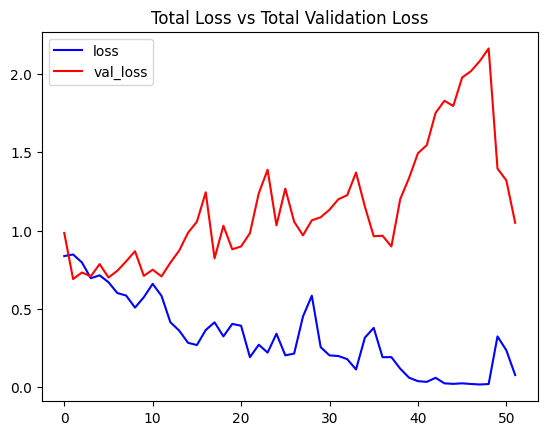

In [ ]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

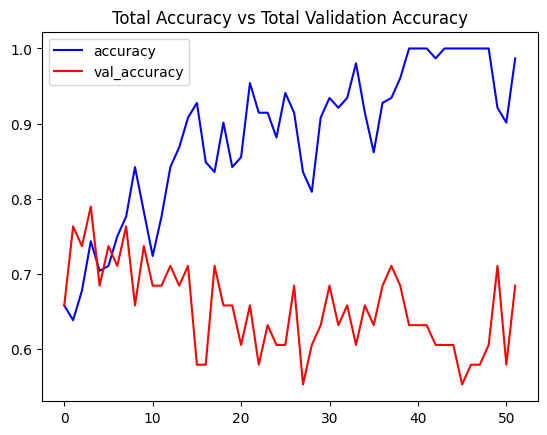

In [ ]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

- stratify o

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=50,  mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

batch_size = 4

# Start training the model.
LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = batch_size ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/100
38/38 [==============================] - 6s 74ms/step - loss: 0.8409 - accuracy: 0.6513 - val_loss: 0.9188 - val_accuracy: 0.7105
Epoch 2/100
38/38 [==============================] - 2s 47ms/step - loss: 0.7456 - accuracy: 0.6974 - val_loss: 0.9066 - val_accuracy: 0.6316
Epoch 3/100
38/38 [==============================] - 2s 46ms/step - loss: 0.7093 - accuracy: 0.7303 - val_loss: 0.9725 - val_accuracy: 0.7105
Epoch 4/100
38/38 [==============================] - 2s 46ms/step - loss: 0.6918 - accuracy: 0.7039 - val_loss: 0.9156 - val_accuracy: 0.6842
Epoch 5/100
38/38 [==============================] - 2s 46ms/step - loss: 0.6394 - accuracy: 0.7368 - val_loss: 1.1680 - val_accuracy: 0.6053
Epoch 6/100
38/38 [==============================] - 2s 47ms/step - loss: 0.6514 - accuracy: 0.7105 - val_loss: 1.1934 - val_accuracy: 0.5000
Epoch 7/100
38/38 [==============================] - 2s 47ms/step - loss: 0.6556 - accuracy: 0.6842 - val_loss: 1.1700 - val_accuracy: 0.5526
Epoch 

In [ ]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

2/2 [==============================] - 0s 80ms/step - loss: 1.3317 - accuracy: 0.5000


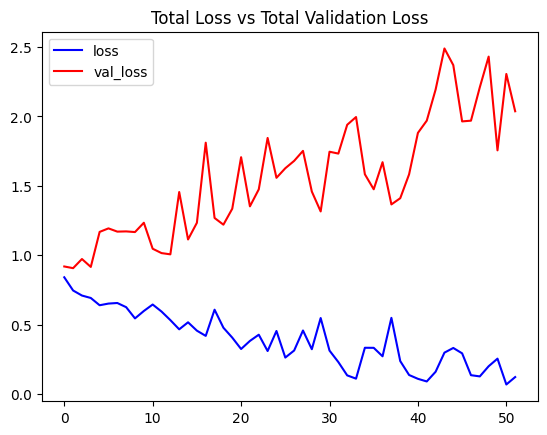

In [ ]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

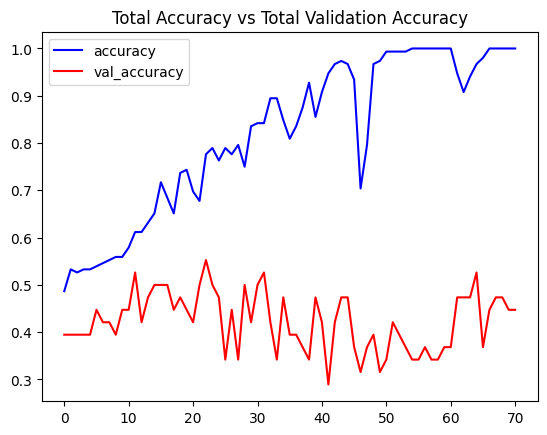

In [ ]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

- train, val, test 비율

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 50, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

batch_size = 4

LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = batch_size,
                                             shuffle = True, validation_data=(features_val, labels_val),
                                             callbacks = [early_stopping_callback])

Epoch 1/100
38/38 [==============================] - 6s 68ms/step - loss: 1.3169 - accuracy: 0.4539 - val_loss: 1.2562 - val_accuracy: 0.5000
Epoch 2/100
38/38 [==============================] - 2s 47ms/step - loss: 1.2671 - accuracy: 0.5000 - val_loss: 1.2220 - val_accuracy: 0.5000
Epoch 3/100
38/38 [==============================] - 2s 47ms/step - loss: 1.2891 - accuracy: 0.4934 - val_loss: 1.2411 - val_accuracy: 0.5000
Epoch 4/100
38/38 [==============================] - 2s 47ms/step - loss: 1.1910 - accuracy: 0.5066 - val_loss: 1.2008 - val_accuracy: 0.5000
Epoch 5/100
38/38 [==============================] - 2s 47ms/step - loss: 1.1713 - accuracy: 0.5066 - val_loss: 1.2162 - val_accuracy: 0.5000
Epoch 6/100
38/38 [==============================] - 2s 47ms/step - loss: 1.1723 - accuracy: 0.5066 - val_loss: 1.1958 - val_accuracy: 0.5000
Epoch 7/100
38/38 [==============================] - 2s 46ms/step - loss: 1.1026 - accuracy: 0.5197 - val_loss: 1.2249 - val_accuracy: 0.5000
Epoch 

In [ ]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

2/2 [==============================] - 0s 67ms/step - loss: 1.0789 - accuracy: 0.6458


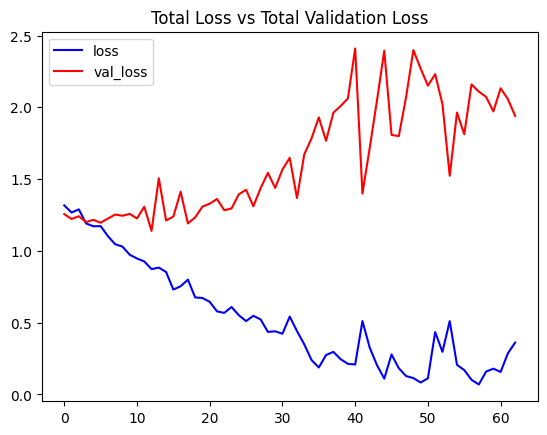

In [ ]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

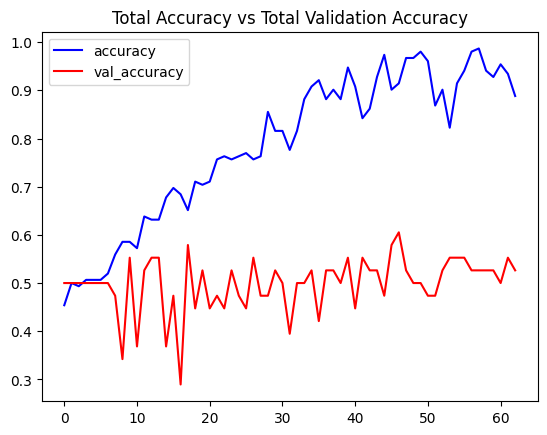

In [ ]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

#L2 있

- stratify x

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=50, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

batch_size = 4

# Start training the model.
LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = batch_size ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/100
38/38 [==============================] - 6s 75ms/step - loss: 1.3374 - accuracy: 0.4868 - val_loss: 1.3328 - val_accuracy: 0.5000
Epoch 2/100
38/38 [==============================] - 2s 47ms/step - loss: 1.3541 - accuracy: 0.5000 - val_loss: 1.3223 - val_accuracy: 0.5000
Epoch 3/100
38/38 [==============================] - 2s 47ms/step - loss: 1.3136 - accuracy: 0.5197 - val_loss: 1.2852 - val_accuracy: 0.5000
Epoch 4/100
38/38 [==============================] - 2s 47ms/step - loss: 1.2566 - accuracy: 0.5066 - val_loss: 1.3125 - val_accuracy: 0.5000
Epoch 5/100
38/38 [==============================] - 2s 47ms/step - loss: 1.2648 - accuracy: 0.5132 - val_loss: 1.2370 - val_accuracy: 0.5000
Epoch 6/100
38/38 [==============================] - 2s 47ms/step - loss: 1.2373 - accuracy: 0.5132 - val_loss: 1.1995 - val_accuracy: 0.5000
Epoch 7/100
38/38 [==============================] - 2s 47ms/step - loss: 1.2078 - accuracy: 0.5132 - val_loss: 1.2366 - val_accuracy: 0.4737
Epoch 

In [ ]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

2/2 [==============================] - 0s 67ms/step - loss: 1.3250 - accuracy: 0.5417


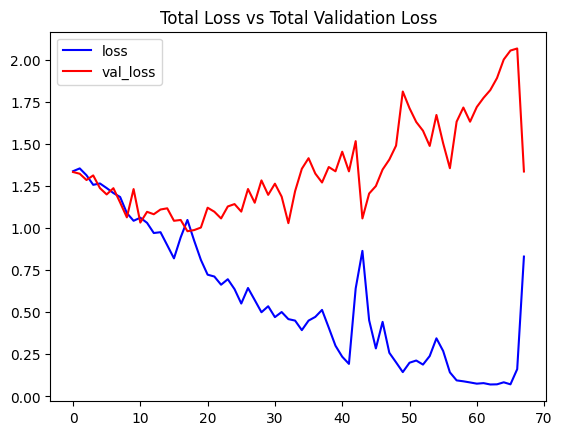

In [ ]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

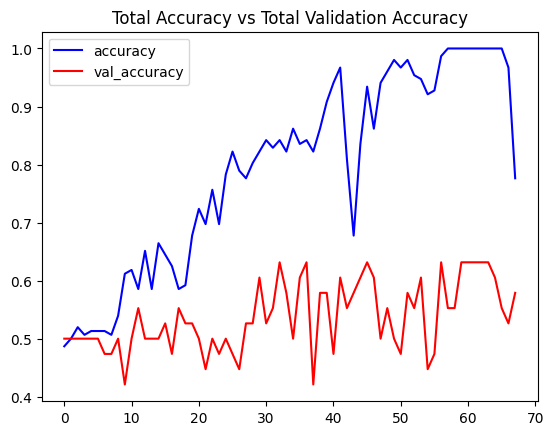

In [ ]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

- stratify o

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=50,  mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

batch_size = 4

# Start training the model.
LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = batch_size ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/100
38/38 [==============================] - 6s 75ms/step - loss: 0.4866 - accuracy: 0.8750 - val_loss: 0.9169 - val_accuracy: 0.7368
Epoch 2/100
38/38 [==============================] - 2s 47ms/step - loss: 0.2925 - accuracy: 0.9342 - val_loss: 1.0623 - val_accuracy: 0.6842
Epoch 3/100
38/38 [==============================] - 2s 47ms/step - loss: 0.3532 - accuracy: 0.9408 - val_loss: 1.2630 - val_accuracy: 0.6579
Epoch 4/100
38/38 [==============================] - 2s 47ms/step - loss: 0.3750 - accuracy: 0.9079 - val_loss: 0.9203 - val_accuracy: 0.7368
Epoch 5/100
38/38 [==============================] - 2s 46ms/step - loss: 0.3633 - accuracy: 0.8816 - val_loss: 1.3234 - val_accuracy: 0.5526
Epoch 6/100
38/38 [==============================] - 2s 47ms/step - loss: 0.3819 - accuracy: 0.9079 - val_loss: 1.0102 - val_accuracy: 0.6316
Epoch 7/100
38/38 [==============================] - 2s 47ms/step - loss: 0.2666 - accuracy: 0.9539 - val_loss: 1.3150 - val_accuracy: 0.6053
Epoch 

In [ ]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

2/2 [==============================] - 0s 67ms/step - loss: 1.2039 - accuracy: 0.6042


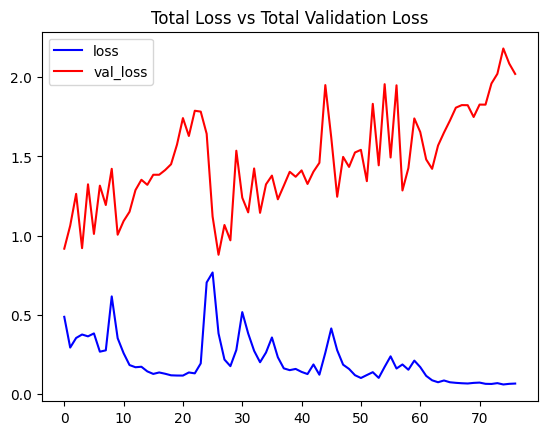

In [ ]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

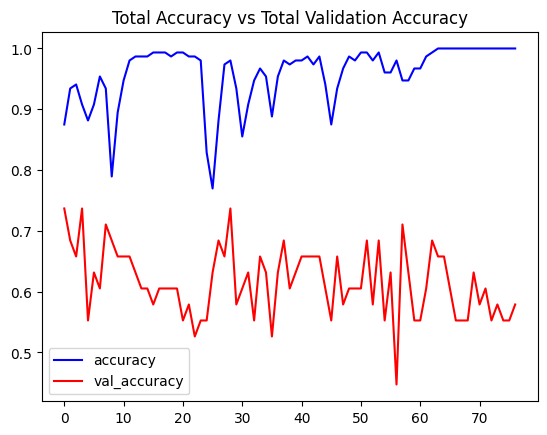

In [ ]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

- train, val, test 비율

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 50, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

batch_size = 4

LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = batch_size,
                                             shuffle = True, validation_data=(features_val, labels_val),
                                             callbacks = [early_stopping_callback])

Epoch 1/100
38/38 [==============================] - 7s 71ms/step - loss: 0.6605 - accuracy: 0.7961 - val_loss: 0.7100 - val_accuracy: 0.7895
Epoch 2/100
38/38 [==============================] - 2s 47ms/step - loss: 0.4616 - accuracy: 0.8684 - val_loss: 0.7063 - val_accuracy: 0.7895
Epoch 3/100
38/38 [==============================] - 2s 47ms/step - loss: 0.6017 - accuracy: 0.8224 - val_loss: 1.0289 - val_accuracy: 0.6842
Epoch 4/100
38/38 [==============================] - 2s 47ms/step - loss: 0.4883 - accuracy: 0.8421 - val_loss: 0.9801 - val_accuracy: 0.7368
Epoch 5/100
38/38 [==============================] - 2s 47ms/step - loss: 0.4514 - accuracy: 0.8947 - val_loss: 0.9094 - val_accuracy: 0.7105
Epoch 6/100
38/38 [==============================] - 2s 47ms/step - loss: 0.3084 - accuracy: 0.9474 - val_loss: 0.8772 - val_accuracy: 0.7368
Epoch 7/100
38/38 [==============================] - 2s 47ms/step - loss: 0.2686 - accuracy: 0.9474 - val_loss: 0.9291 - val_accuracy: 0.7368
Epoch 

In [ ]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

2/2 [==============================] - 0s 68ms/step - loss: 1.1389 - accuracy: 0.6458


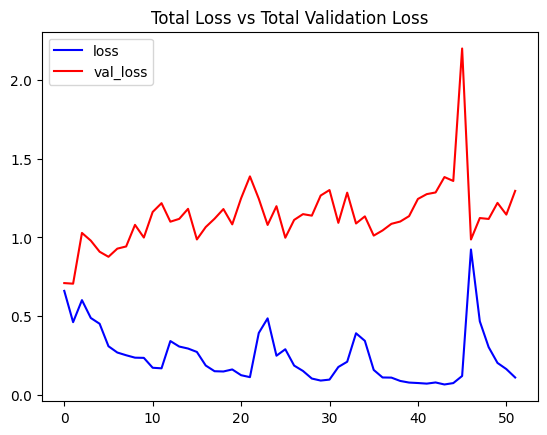

In [ ]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

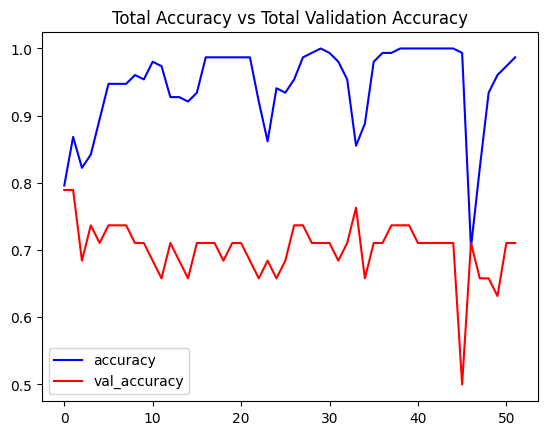

In [ ]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

# dropout(0.5) + 레이어 4개에 다 L2 정규화 >>> 언더피팅

In [ ]:

# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=50,  mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

batch_size = 4

# Start training the model.
LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = batch_size ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/100
14/14 [==============================] - 5s 122ms/step - loss: 2.3442 - accuracy: 0.3929 - val_loss: 2.3093 - val_accuracy: 0.2143
Epoch 2/100
14/14 [==============================] - 1s 52ms/step - loss: 2.1014 - accuracy: 0.4643 - val_loss: 2.0629 - val_accuracy: 0.2143
Epoch 3/100
14/14 [==============================] - 1s 51ms/step - loss: 1.9201 - accuracy: 0.4286 - val_loss: 1.9315 - val_accuracy: 0.2143
Epoch 4/100
14/14 [==============================] - 1s 51ms/step - loss: 1.7777 - accuracy: 0.4643 - val_loss: 1.7836 - val_accuracy: 0.2143
Epoch 5/100
14/14 [==============================] - 1s 51ms/step - loss: 1.6532 - accuracy: 0.4821 - val_loss: 1.6648 - val_accuracy: 0.2143
Epoch 6/100
14/14 [==============================] - 1s 52ms/step - loss: 1.5558 - accuracy: 0.4821 - val_loss: 1.6643 - val_accuracy: 0.2143
Epoch 7/100
14/14 [==============================] - 1s 51ms/step - loss: 1.4986 - accuracy: 0.5000 - val_loss: 1.5322 - val_accuracy: 0.2143
Epoch

In [ ]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

1/1 [==============================] - 0s 216ms/step - loss: 1.9325 - accuracy: 0.3333


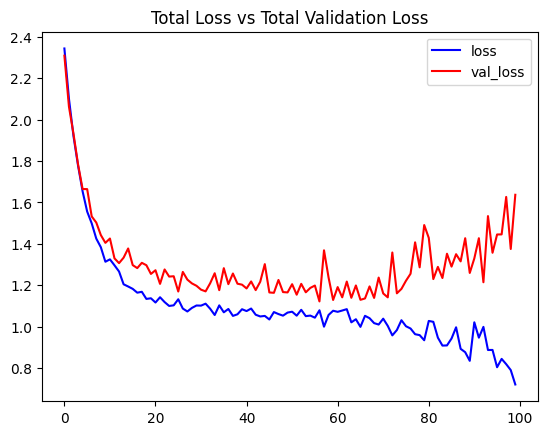

In [ ]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

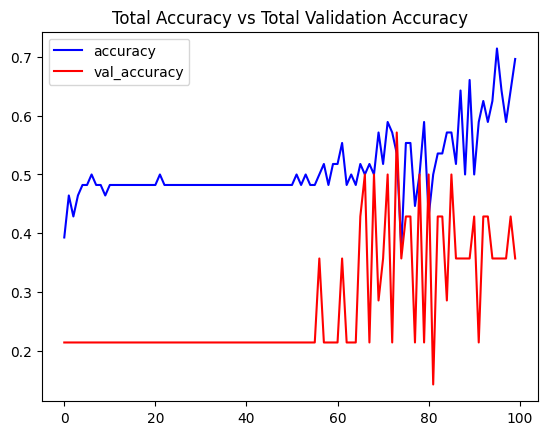

In [ ]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

진행 하지 않기로..

# 레이어 밑 두개에만 L2정규화 >> 언더피팅

In [ ]:
(1)
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=50,  mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

batch_size = 4

# Start training the model.
LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = batch_size ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/100
14/14 [==============================] - 5s 123ms/step - loss: 2.1486 - accuracy: 0.3393 - val_loss: 2.0114 - val_accuracy: 0.4286
Epoch 2/100
14/14 [==============================] - 1s 52ms/step - loss: 1.9100 - accuracy: 0.4286 - val_loss: 1.8555 - val_accuracy: 0.2143
Epoch 3/100
14/14 [==============================] - 1s 51ms/step - loss: 1.7450 - accuracy: 0.4821 - val_loss: 1.7617 - val_accuracy: 0.2143
Epoch 4/100
14/14 [==============================] - 1s 51ms/step - loss: 1.6025 - accuracy: 0.4821 - val_loss: 1.6337 - val_accuracy: 0.2143
Epoch 5/100
14/14 [==============================] - 1s 51ms/step - loss: 1.5097 - accuracy: 0.4821 - val_loss: 1.5320 - val_accuracy: 0.2143
Epoch 6/100
14/14 [==============================] - 1s 52ms/step - loss: 1.4395 - accuracy: 0.4821 - val_loss: 1.4837 - val_accuracy: 0.2143
Epoch 7/100
14/14 [==============================] - 1s 52ms/step - loss: 1.3852 - accuracy: 0.4643 - val_loss: 1.4263 - val_accuracy: 0.2143
Epoch

KeyboardInterrupt: ignored

진행하지 않기로..

# dropout(0.5) 추가, batch_size=8

#L2 없

- stratify X

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 50, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

batch_size = 8

# Start training the model.
LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = batch_size ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/100
19/19 [==============================] - 6s 134ms/step - loss: 0.7361 - accuracy: 0.7105 - val_loss: 0.9155 - val_accuracy: 0.6053
Epoch 2/100
19/19 [==============================] - 2s 89ms/step - loss: 0.7715 - accuracy: 0.6645 - val_loss: 0.6853 - val_accuracy: 0.6842
Epoch 3/100
19/19 [==============================] - 2s 89ms/step - loss: 0.7168 - accuracy: 0.7237 - val_loss: 0.7048 - val_accuracy: 0.7105
Epoch 4/100
19/19 [==============================] - 2s 89ms/step - loss: 0.6406 - accuracy: 0.7434 - val_loss: 0.6592 - val_accuracy: 0.7632
Epoch 5/100
19/19 [==============================] - 2s 88ms/step - loss: 0.6275 - accuracy: 0.7500 - val_loss: 0.7319 - val_accuracy: 0.6842
Epoch 6/100
19/19 [==============================] - 2s 88ms/step - loss: 0.5319 - accuracy: 0.7566 - val_loss: 0.7398 - val_accuracy: 0.6842
Epoch 7/100
19/19 [==============================] - 2s 89ms/step - loss: 0.5215 - accuracy: 0.7763 - val_loss: 0.7501 - val_accuracy: 0.7105
Epoch

In [ ]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

2/2 [==============================] - 0s 67ms/step - loss: 0.9364 - accuracy: 0.6250


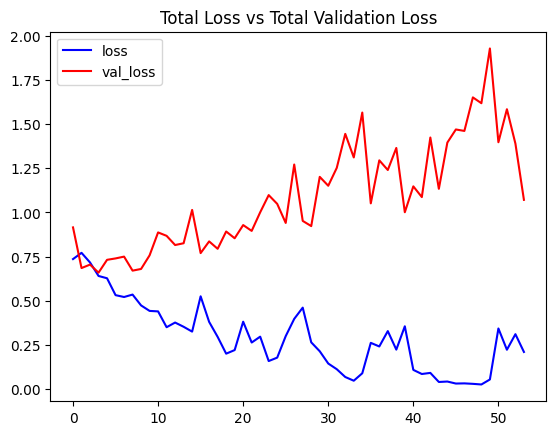

In [ ]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

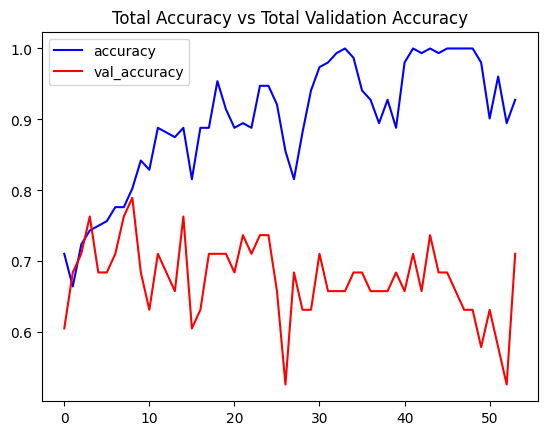

In [ ]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

- stratify o

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=50,  mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

batch_size = 8

# Start training the model.
LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = batch_size ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/100
19/19 [==============================] - 6s 145ms/step - loss: 0.7019 - accuracy: 0.7566 - val_loss: 0.9461 - val_accuracy: 0.7105
Epoch 2/100
19/19 [==============================] - 2s 89ms/step - loss: 0.6472 - accuracy: 0.7105 - val_loss: 0.9061 - val_accuracy: 0.6053
Epoch 3/100
19/19 [==============================] - 2s 88ms/step - loss: 0.6561 - accuracy: 0.7303 - val_loss: 0.9623 - val_accuracy: 0.7105
Epoch 4/100
19/19 [==============================] - 2s 90ms/step - loss: 0.6280 - accuracy: 0.7566 - val_loss: 0.9123 - val_accuracy: 0.6316
Epoch 5/100
19/19 [==============================] - 2s 89ms/step - loss: 0.5992 - accuracy: 0.7171 - val_loss: 1.0884 - val_accuracy: 0.5526
Epoch 6/100
19/19 [==============================] - 2s 88ms/step - loss: 0.5099 - accuracy: 0.7895 - val_loss: 0.9417 - val_accuracy: 0.6053
Epoch 7/100
19/19 [==============================] - 2s 88ms/step - loss: 0.5371 - accuracy: 0.7171 - val_loss: 1.0388 - val_accuracy: 0.6053
Epoch

In [ ]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

ResourceExhaustedError: ignored

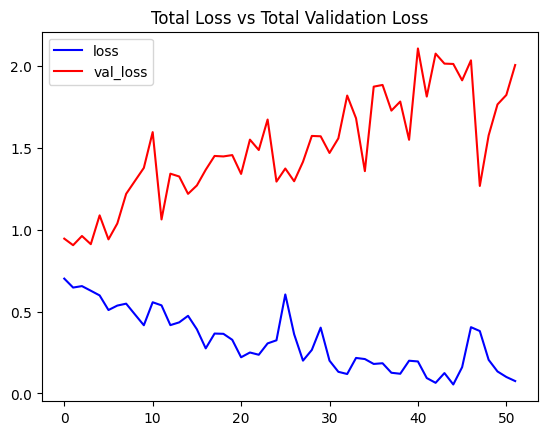

In [ ]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

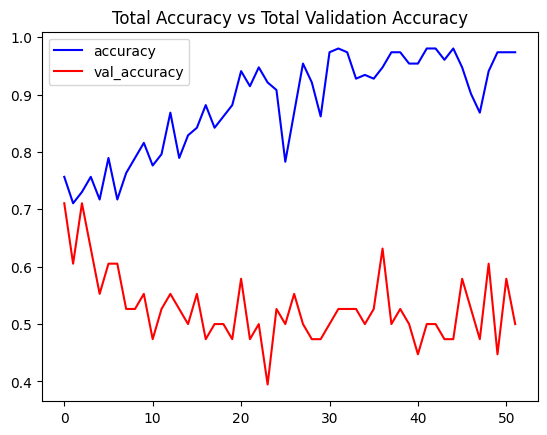

In [ ]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

- train, val, test 비율

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 50, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

batch_size = 8

LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = batch_size,
                                             shuffle = True, validation_data=(features_val, labels_val),
                                             callbacks = [early_stopping_callback])

Epoch 1/100
19/19 [==============================] - 6s 135ms/step - loss: 0.7526 - accuracy: 0.7039 - val_loss: 1.2115 - val_accuracy: 0.5263
Epoch 2/100
19/19 [==============================] - 2s 89ms/step - loss: 0.7316 - accuracy: 0.6974 - val_loss: 1.2222 - val_accuracy: 0.4737
Epoch 3/100
19/19 [==============================] - 2s 88ms/step - loss: 0.6938 - accuracy: 0.7171 - val_loss: 1.2073 - val_accuracy: 0.5000
Epoch 4/100
19/19 [==============================] - 2s 88ms/step - loss: 0.6282 - accuracy: 0.6579 - val_loss: 1.2350 - val_accuracy: 0.5263
Epoch 5/100
19/19 [==============================] - 2s 88ms/step - loss: 0.6812 - accuracy: 0.7039 - val_loss: 1.2531 - val_accuracy: 0.5000
Epoch 6/100
19/19 [==============================] - 2s 89ms/step - loss: 0.6863 - accuracy: 0.7237 - val_loss: 1.2234 - val_accuracy: 0.4737
Epoch 7/100
19/19 [==============================] - 2s 89ms/step - loss: 0.5987 - accuracy: 0.7500 - val_loss: 1.2568 - val_accuracy: 0.5000
Epoch

In [ ]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

2/2 [==============================] - 0s 69ms/step - loss: 1.2316 - accuracy: 0.4792


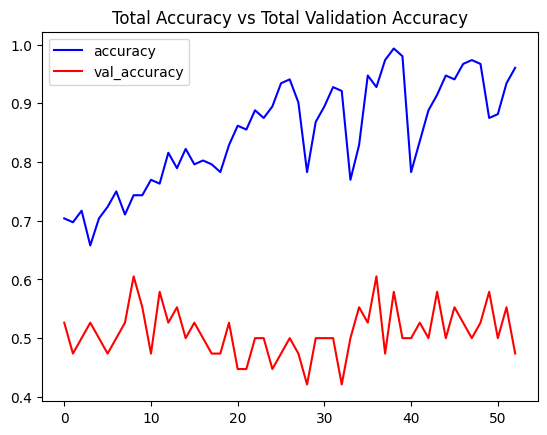

In [ ]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

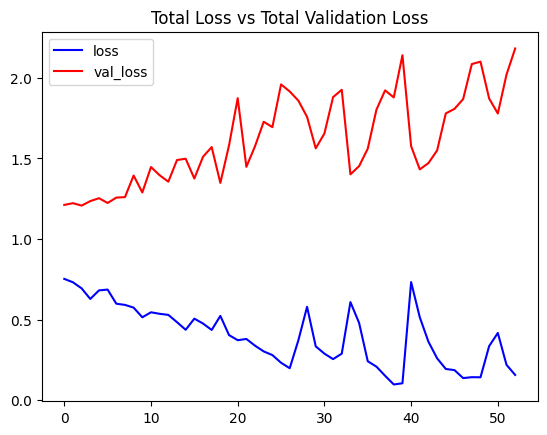

In [ ]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

# 맨마지막 층 L2

- stratify x

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 50, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

batch_size = 8

# Start training the model.
LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = batch_size ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/100
19/19 [==============================] - 6s 147ms/step - loss: 0.9252 - accuracy: 0.6184 - val_loss: 0.9368 - val_accuracy: 0.6053
Epoch 2/100
19/19 [==============================] - 2s 89ms/step - loss: 0.7672 - accuracy: 0.6776 - val_loss: 0.9617 - val_accuracy: 0.5263
Epoch 3/100
19/19 [==============================] - 2s 88ms/step - loss: 0.7040 - accuracy: 0.7105 - val_loss: 0.9477 - val_accuracy: 0.5526
Epoch 4/100
19/19 [==============================] - 2s 88ms/step - loss: 0.6787 - accuracy: 0.7500 - val_loss: 1.0678 - val_accuracy: 0.4211
Epoch 5/100
19/19 [==============================] - 2s 88ms/step - loss: 0.6652 - accuracy: 0.7829 - val_loss: 1.0606 - val_accuracy: 0.5000
Epoch 6/100
19/19 [==============================] - 2s 89ms/step - loss: 0.6111 - accuracy: 0.7566 - val_loss: 1.0962 - val_accuracy: 0.5000
Epoch 7/100
19/19 [==============================] - 2s 89ms/step - loss: 0.6071 - accuracy: 0.7632 - val_loss: 1.0761 - val_accuracy: 0.5263
Epoch

In [ ]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

ResourceExhaustedError: ignored

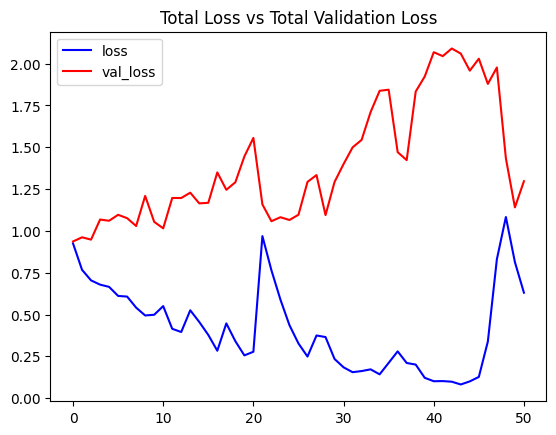

In [ ]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

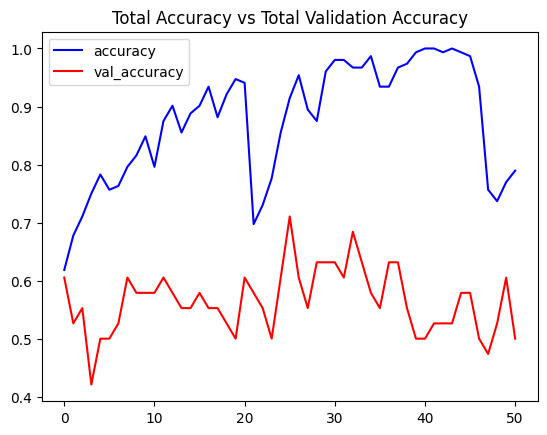

In [ ]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

- stratify o

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 50, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

batch_size = 8

# Start training the model.
LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = batch_size ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/100
19/19 [==============================] - 5s 134ms/step - loss: 0.0618 - accuracy: 0.9934 - val_loss: 2.2202 - val_accuracy: 0.5000
Epoch 2/100
19/19 [==============================] - 2s 89ms/step - loss: 0.0904 - accuracy: 0.9934 - val_loss: 2.1448 - val_accuracy: 0.5789
Epoch 3/100
19/19 [==============================] - 2s 88ms/step - loss: 0.1026 - accuracy: 0.9934 - val_loss: 2.2625 - val_accuracy: 0.5526
Epoch 4/100
19/19 [==============================] - 2s 89ms/step - loss: 0.0460 - accuracy: 1.0000 - val_loss: 2.2436 - val_accuracy: 0.5526
Epoch 5/100
19/19 [==============================] - 2s 90ms/step - loss: 0.0484 - accuracy: 1.0000 - val_loss: 1.9179 - val_accuracy: 0.5789
Epoch 6/100
19/19 [==============================] - 2s 88ms/step - loss: 0.0901 - accuracy: 0.9868 - val_loss: 2.6623 - val_accuracy: 0.5263
Epoch 7/100
19/19 [==============================] - 2s 90ms/step - loss: 0.1230 - accuracy: 0.9868 - val_loss: 2.2939 - val_accuracy: 0.5000
Epoch

In [ ]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

2/2 [==============================] - 0s 67ms/step - loss: 2.0234 - accuracy: 0.5625


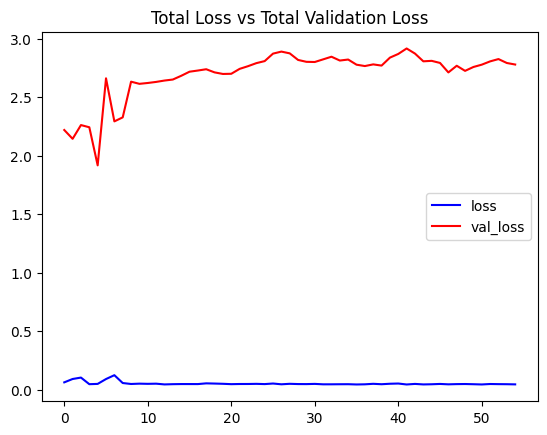

In [ ]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

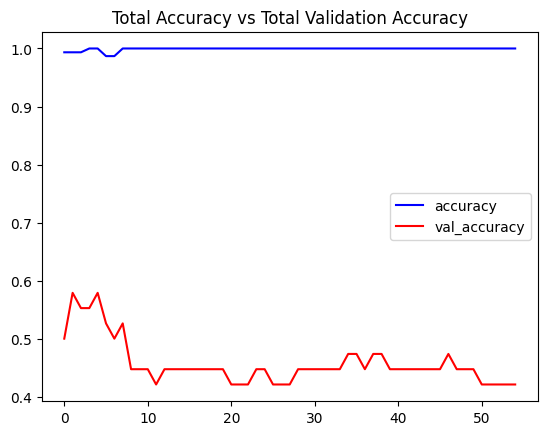

In [ ]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

- train, val, test 비율

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 50, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

batch_size = 8

LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = batch_size,
                                             shuffle = True, validation_data=(features_val, labels_val),
                                             callbacks = [early_stopping_callback])

Epoch 1/100
19/19 [==============================] - 5s 134ms/step - loss: 0.3761 - accuracy: 0.9079 - val_loss: 0.7715 - val_accuracy: 0.7895
Epoch 2/100
19/19 [==============================] - 2s 89ms/step - loss: 0.3577 - accuracy: 0.9276 - val_loss: 0.8557 - val_accuracy: 0.7105
Epoch 3/100
19/19 [==============================] - 2s 90ms/step - loss: 0.3378 - accuracy: 0.9342 - val_loss: 0.8576 - val_accuracy: 0.7632
Epoch 4/100
19/19 [==============================] - 2s 91ms/step - loss: 0.2456 - accuracy: 0.9539 - val_loss: 0.9754 - val_accuracy: 0.7105
Epoch 5/100
19/19 [==============================] - 2s 90ms/step - loss: 0.2550 - accuracy: 0.9408 - val_loss: 0.9724 - val_accuracy: 0.7368
Epoch 6/100
19/19 [==============================] - 2s 89ms/step - loss: 0.4385 - accuracy: 0.8618 - val_loss: 0.9851 - val_accuracy: 0.7368
Epoch 7/100
19/19 [==============================] - 2s 89ms/step - loss: 0.4139 - accuracy: 0.8684 - val_loss: 0.9789 - val_accuracy: 0.7105
Epoch

In [ ]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

2/2 [==============================] - 0s 67ms/step - loss: 0.9915 - accuracy: 0.6458


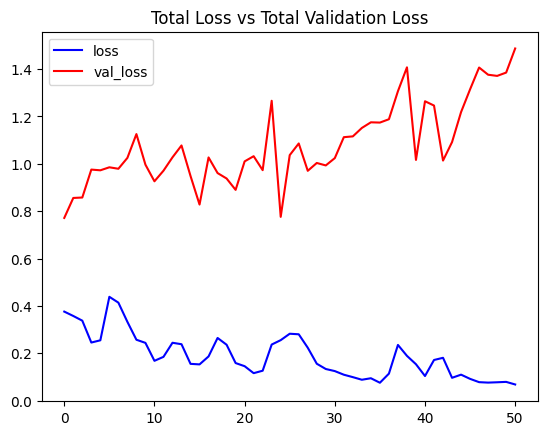

In [ ]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

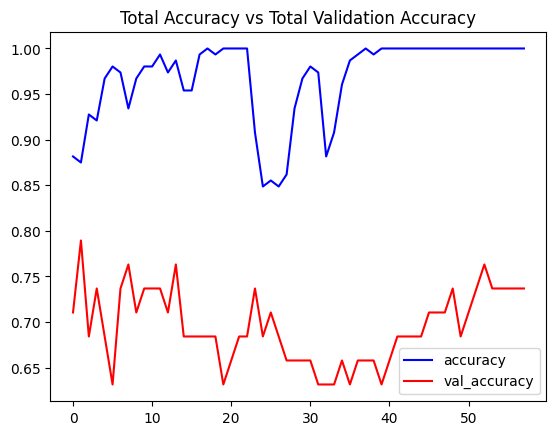

In [ ]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

# dropout 0.5, batch size 16

# L2 없을 때

- stratify x

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 50, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

batch_size = 16

# Start training the model.
LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = batch_size ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/100
10/10 [==============================] - 6s 292ms/step - loss: 0.6290 - accuracy: 0.7566 - val_loss: 0.6906 - val_accuracy: 0.7105
Epoch 2/100
10/10 [==============================] - 2s 183ms/step - loss: 0.5893 - accuracy: 0.7434 - val_loss: 0.7873 - val_accuracy: 0.6579
Epoch 3/100
10/10 [==============================] - 2s 184ms/step - loss: 0.6200 - accuracy: 0.7500 - val_loss: 0.7597 - val_accuracy: 0.6842
Epoch 4/100
10/10 [==============================] - 2s 183ms/step - loss: 0.5579 - accuracy: 0.7895 - val_loss: 0.7006 - val_accuracy: 0.7368
Epoch 5/100
10/10 [==============================] - 2s 184ms/step - loss: 0.4842 - accuracy: 0.8224 - val_loss: 0.6957 - val_accuracy: 0.7368
Epoch 6/100
10/10 [==============================] - 2s 184ms/step - loss: 0.4316 - accuracy: 0.8289 - val_loss: 0.7923 - val_accuracy: 0.7105
Epoch 7/100
10/10 [==============================] - 2s 187ms/step - loss: 0.4308 - accuracy: 0.8355 - val_loss: 0.7191 - val_accuracy: 0.7105

In [ ]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

2/2 [==============================] - 0s 66ms/step - loss: 1.0373 - accuracy: 0.5833


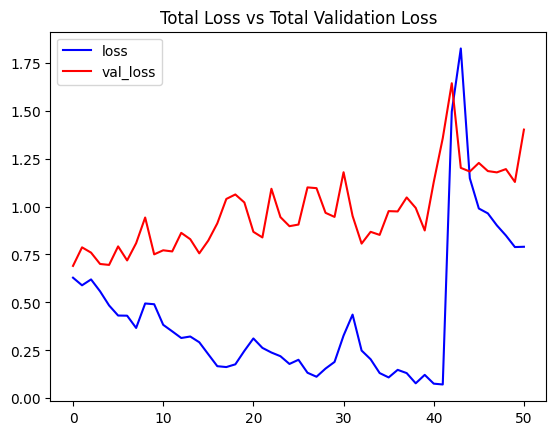

In [ ]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

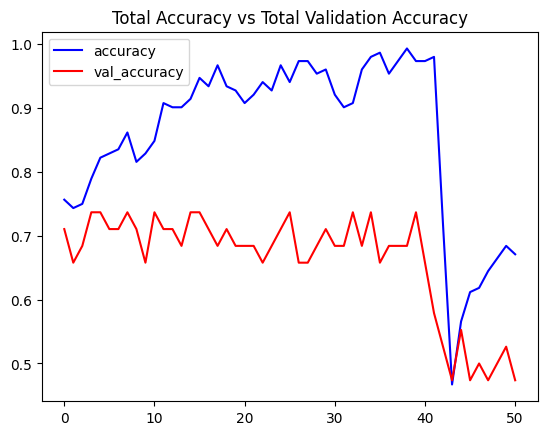

In [ ]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

- stratify o

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 50, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

batch_size = 16

# Start training the model.
LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = batch_size ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/100
10/10 [==============================] - 8s 285ms/step - loss: 0.6552 - accuracy: 0.7895 - val_loss: 0.8985 - val_accuracy: 0.6316
Epoch 2/100
10/10 [==============================] - 2s 184ms/step - loss: 0.6486 - accuracy: 0.7039 - val_loss: 0.9758 - val_accuracy: 0.6842
Epoch 3/100
10/10 [==============================] - 2s 186ms/step - loss: 0.6015 - accuracy: 0.7368 - val_loss: 1.0055 - val_accuracy: 0.6316
Epoch 4/100
10/10 [==============================] - 2s 188ms/step - loss: 0.6001 - accuracy: 0.7368 - val_loss: 0.9593 - val_accuracy: 0.6316
Epoch 5/100
10/10 [==============================] - 2s 186ms/step - loss: 0.5915 - accuracy: 0.7697 - val_loss: 1.0254 - val_accuracy: 0.6842
Epoch 6/100
10/10 [==============================] - 2s 186ms/step - loss: 0.5508 - accuracy: 0.7895 - val_loss: 0.9187 - val_accuracy: 0.6053
Epoch 7/100
10/10 [==============================] - 2s 187ms/step - loss: 0.5734 - accuracy: 0.7829 - val_loss: 1.2733 - val_accuracy: 0.6316

In [ ]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

2/2 [==============================] - 0s 68ms/step - loss: 1.4023 - accuracy: 0.4583


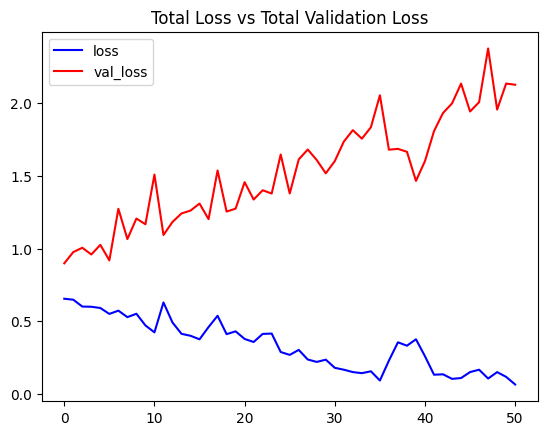

In [ ]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

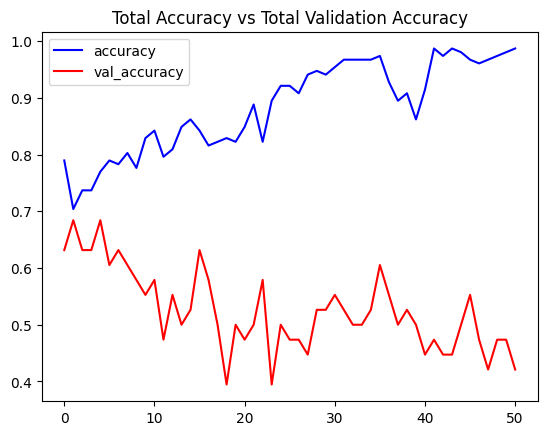

In [ ]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

- train, val, test 비율

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 50, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

batch_size = 16

LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = batch_size,
                                             shuffle = True, validation_data=(features_val, labels_val),
                                             callbacks = [early_stopping_callback])

Epoch 1/100
10/10 [==============================] - 6s 294ms/step - loss: 0.6713 - accuracy: 0.7500 - val_loss: 1.2358 - val_accuracy: 0.5263
Epoch 2/100
10/10 [==============================] - 2s 185ms/step - loss: 0.6183 - accuracy: 0.7171 - val_loss: 1.2113 - val_accuracy: 0.5263
Epoch 3/100
10/10 [==============================] - 2s 185ms/step - loss: 0.6069 - accuracy: 0.6908 - val_loss: 1.2940 - val_accuracy: 0.4474
Epoch 4/100
10/10 [==============================] - 2s 183ms/step - loss: 0.6213 - accuracy: 0.7434 - val_loss: 1.3387 - val_accuracy: 0.5526
Epoch 5/100
10/10 [==============================] - 2s 184ms/step - loss: 0.6202 - accuracy: 0.7237 - val_loss: 1.3020 - val_accuracy: 0.5000
Epoch 6/100
10/10 [==============================] - 2s 184ms/step - loss: 0.5500 - accuracy: 0.7368 - val_loss: 1.3164 - val_accuracy: 0.6053
Epoch 7/100
10/10 [==============================] - 2s 185ms/step - loss: 0.5552 - accuracy: 0.7237 - val_loss: 1.3216 - val_accuracy: 0.4737

In [ ]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

2/2 [==============================] - 0s 67ms/step - loss: 1.2596 - accuracy: 0.5625


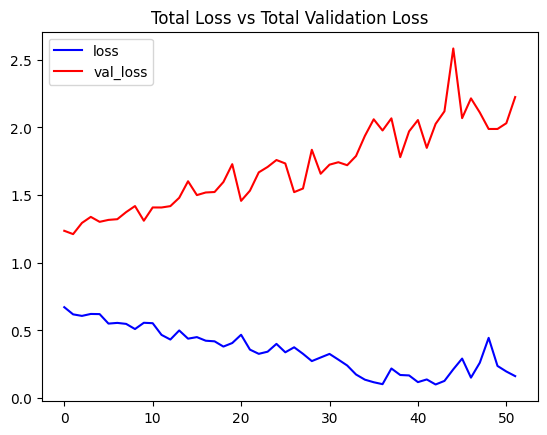

In [ ]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

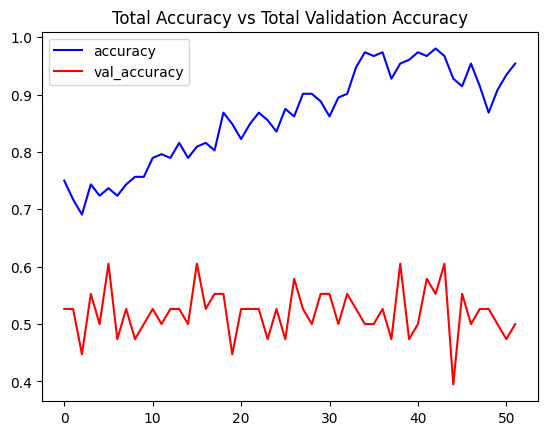

In [ ]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

# L2 있을 때

- stratify x

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 50, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

batch_size = 16

# Start training the model.
LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = batch_size ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/100
10/10 [==============================] - 6s 278ms/step - loss: 0.8016 - accuracy: 0.6776 - val_loss: 0.9432 - val_accuracy: 0.5263
Epoch 2/100
10/10 [==============================] - 2s 184ms/step - loss: 0.7129 - accuracy: 0.7105 - val_loss: 1.0174 - val_accuracy: 0.5526
Epoch 3/100
10/10 [==============================] - 2s 185ms/step - loss: 0.6688 - accuracy: 0.7500 - val_loss: 0.9333 - val_accuracy: 0.5263
Epoch 4/100
10/10 [==============================] - 2s 185ms/step - loss: 0.6413 - accuracy: 0.7566 - val_loss: 0.9962 - val_accuracy: 0.4737
Epoch 5/100
10/10 [==============================] - 2s 185ms/step - loss: 0.5874 - accuracy: 0.7434 - val_loss: 1.2548 - val_accuracy: 0.5789
Epoch 6/100
10/10 [==============================] - 2s 185ms/step - loss: 0.6086 - accuracy: 0.7632 - val_loss: 0.9737 - val_accuracy: 0.4474
Epoch 7/100
10/10 [==============================] - 2s 187ms/step - loss: 0.5979 - accuracy: 0.8158 - val_loss: 0.9887 - val_accuracy: 0.5789

In [ ]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

2/2 [==============================] - 0s 67ms/step - loss: 1.5073 - accuracy: 0.3958


# loss: 1.3565 - accuracy: 0.6667

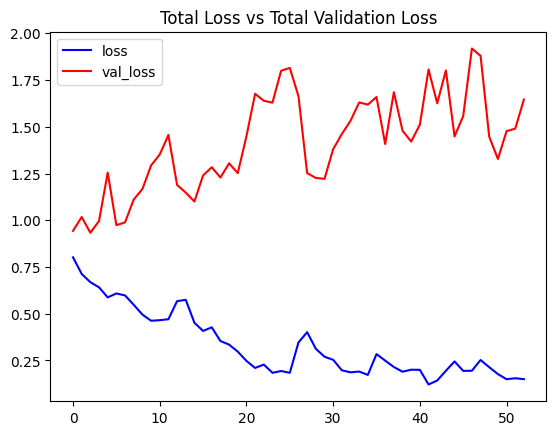

In [ ]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

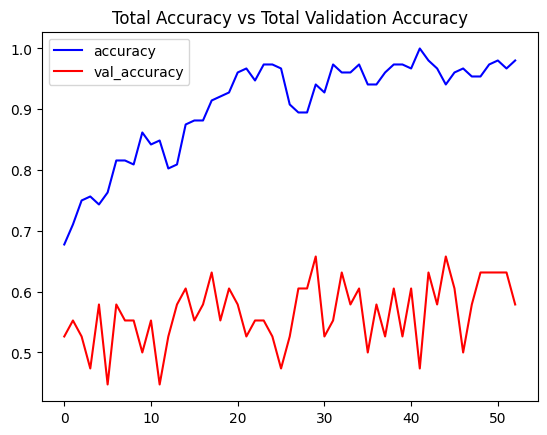

In [ ]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

- stratify o

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 50, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

batch_size = 16

# Start training the model.
LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = batch_size ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/100
10/10 [==============================] - 6s 277ms/step - loss: 0.6895 - accuracy: 0.7697 - val_loss: 1.2315 - val_accuracy: 0.6316
Epoch 2/100
10/10 [==============================] - 2s 183ms/step - loss: 0.3803 - accuracy: 0.8816 - val_loss: 1.6470 - val_accuracy: 0.5000
Epoch 3/100
10/10 [==============================] - 2s 184ms/step - loss: 0.3129 - accuracy: 0.9079 - val_loss: 1.5833 - val_accuracy: 0.5789
Epoch 4/100
10/10 [==============================] - 2s 185ms/step - loss: 0.1481 - accuracy: 0.9671 - val_loss: 1.7858 - val_accuracy: 0.5000
Epoch 5/100
10/10 [==============================] - 2s 188ms/step - loss: 0.1783 - accuracy: 0.9605 - val_loss: 1.8032 - val_accuracy: 0.5263
Epoch 6/100
10/10 [==============================] - 2s 185ms/step - loss: 0.1410 - accuracy: 0.9803 - val_loss: 1.5892 - val_accuracy: 0.6316
Epoch 7/100
10/10 [==============================] - 2s 186ms/step - loss: 0.2487 - accuracy: 0.9539 - val_loss: 1.5759 - val_accuracy: 0.6053

In [ ]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

2/2 [==============================] - 0s 67ms/step - loss: 1.2118 - accuracy: 0.6458


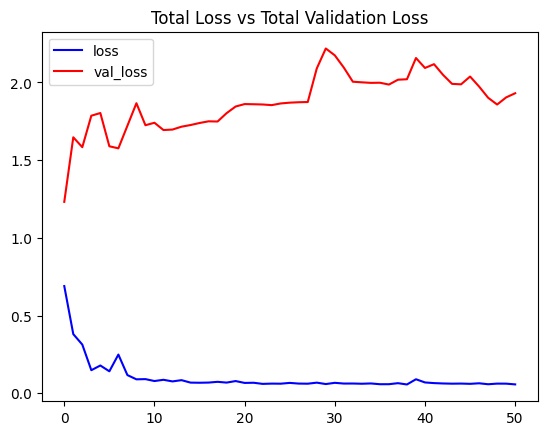

In [ ]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

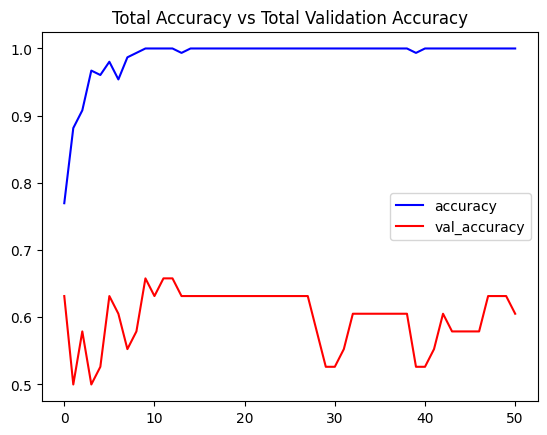

In [ ]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

- train, val, test 비율

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 50, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

batch_size = 16

LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = batch_size,
                                             shuffle = True, validation_data=(features_val, labels_val),
                                             callbacks = [early_stopping_callback])

Epoch 1/100
10/10 [==============================] - 6s 273ms/step - loss: 0.4241 - accuracy: 0.9013 - val_loss: 0.8755 - val_accuracy: 0.7368
Epoch 2/100
10/10 [==============================] - 2s 183ms/step - loss: 0.3738 - accuracy: 0.9145 - val_loss: 0.7329 - val_accuracy: 0.8158
Epoch 3/100
10/10 [==============================] - 2s 184ms/step - loss: 0.2754 - accuracy: 0.9408 - val_loss: 0.7343 - val_accuracy: 0.7632
Epoch 4/100
10/10 [==============================] - 2s 183ms/step - loss: 0.2261 - accuracy: 0.9539 - val_loss: 0.8777 - val_accuracy: 0.7368
Epoch 5/100
10/10 [==============================] - 2s 186ms/step - loss: 0.2096 - accuracy: 0.9605 - val_loss: 0.8733 - val_accuracy: 0.7632
Epoch 6/100
10/10 [==============================] - 2s 185ms/step - loss: 0.1905 - accuracy: 0.9737 - val_loss: 0.8444 - val_accuracy: 0.7632
Epoch 7/100
10/10 [==============================] - 2s 186ms/step - loss: 0.1946 - accuracy: 0.9737 - val_loss: 1.0003 - val_accuracy: 0.7105

In [ ]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

2/2 [==============================] - 0s 67ms/step - loss: 1.3462 - accuracy: 0.5208


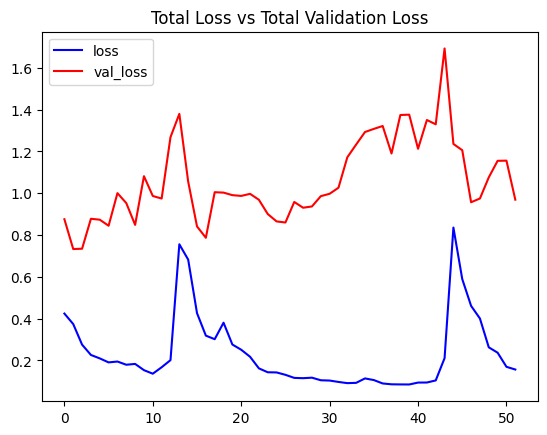

In [ ]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

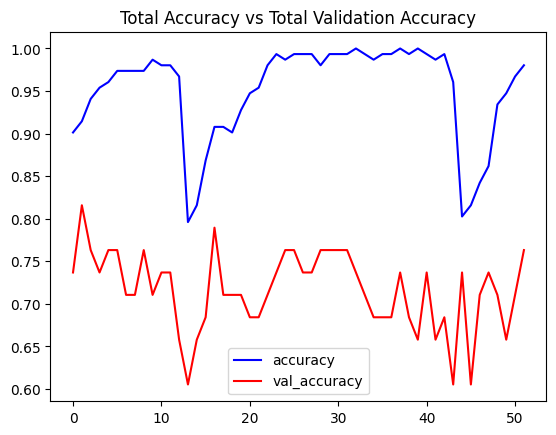

In [ ]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

# dropout(0.5) batch size 32

# L2 없

- stratify x

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 50, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

batch_size = 32

# Start training the model.
LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = batch_size ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

In [ ]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

In [ ]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

In [ ]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

# dropout(0.5) batch size 64

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 50, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

batch_size = 64

# Start training the model.
LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = batch_size ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/100


ResourceExhaustedError: ignored

In [ ]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)